## Observations and Insights 

In [2]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# define study data filenames
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [5]:
# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
# combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# checking the number of mice.
len(combined_data["Mouse ID"].unique())


249

In [8]:
# getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]


In [9]:
# get all the data for the duplicate mouse ID. 
mouse_list = duplicate["Mouse ID"].unique()

In [10]:
# create a clean DataFrame by dropping the duplicate mouse by its ID.
for x in mouse_list:
    indexNames = combined_data[combined_data["Mouse ID"] == x].index
    combined_data.drop(indexNames, inplace = True)

In [11]:
# checking the number of mice in the clean DataFrame.
len(combined_data["Mouse ID"].unique())

248

## Summary Statistics

In [12]:
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# pull drug regimen and tumor volume
tumor_vol_by_regimen = combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]

# calculate mean, median variance, standard deviation and SEM by drug regimen
mean_vol = tumor_vol_by_regimen.groupby("Drug Regimen").mean()
median_vol = tumor_vol_by_regimen.groupby("Drug Regimen").median()
var_vol = tumor_vol_by_regimen.groupby("Drug Regimen").var()
std_vol = tumor_vol_by_regimen.groupby("Drug Regimen").std()
sem_vol = tumor_vol_by_regimen.groupby("Drug Regimen").sem()

# merge first 2 dataframes and rename columns with more meaningful names
summary_df = pd.merge(mean_vol, median_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Vol", "Tumor Volume (mm3)_y": "Median Tumor Vol"}, inplace=True)

# merge in 3rd and 4th dataframes and rename columns with more meaningful names
summary_df = pd.merge(summary_df, var_vol, on="Drug Regimen")
summary_df = pd.merge(summary_df, std_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)_x": "Variance of Tumor Vol", "Tumor Volume (mm3)_y": "Std Var of Tumor Vol"}, inplace=True)

# merge in 5th dataframe and rename new column with more meaningful names
summary_df = pd.merge(summary_df, sem_vol, on="Drug Regimen")
summary_df.rename(columns={"Tumor Volume (mm3)": "SEM of Tumor Vol"}, inplace=True)

# display summary dataframe
summary_df

,Mean Tumor Vol,Median Tumor Vol,Variance of Tumor Vol,Std Var of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

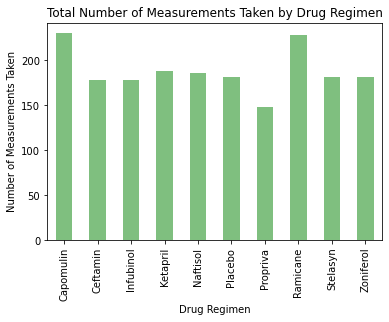

<Figure size 432x288 with 0 Axes>

In [13]:
# Pandas Bar Chart

# pull all drug regimen and mouse ids.  each mouse id represents a measurement taken
measurement_df = combined_data[["Drug Regimen", "Mouse ID"]]

# group by drug regimen and generate of count of measurements taken
regimen_list = measurement_df.groupby("Drug Regimen")
num_meas_list = measurement_df.groupby("Drug Regimen").count()

# generate a bar plot showing the total number of measurements taken on each drug regimen using pandas
measurement_chart = num_meas_list.plot(kind='bar', color="green", alpha=0.5, legend=False)

# set the title and axis labels using class methods
measurement_chart.set_title("Total Number of Measurements Taken by Drug Regimen")
measurement_chart.set_xlabel("Drug Regimen")
measurement_chart.set_ylabel("Number of Measurements Taken")

# display the chart
plt.show()
plt.tight_layout()

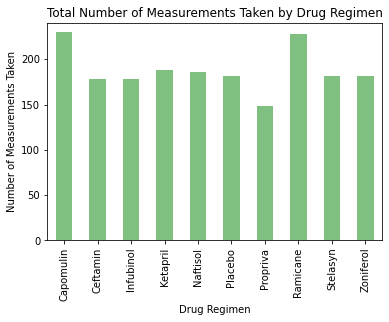

<Figure size 432x288 with 0 Axes>

In [14]:
# Pyplot Bar Chart

# create a list of drug regimens and measurement counts
drug_regimens = num_meas_list.index
num_measurements = num_meas_list["Mouse ID"].to_list()

# generate a bar chart showing the total number of measurements taken on each
# drug regimen using pyplot
plt.bar(drug_regimens, num_measurements, color="green", alpha=0.5, align='center', width=0.5)

# rotate the x-axis labels vertically and set chart limits
plt.xticks(rotation="vertical")
plt.xlim(-0.5, len(x_axis) - 0.5)
plt.ylim(0, max(y_axis)+10)

# set title and axis labels
plt.title("Total Number of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

# display the chart
plt.show()
plt.tight_layout()


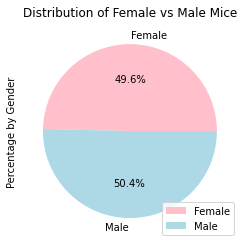

In [15]:
# Pandas Pie Chart

# pull mouse ID and gender data
gender_df = combined_data[["Mouse ID", "Sex"]]

# remove duplicate mouse IDs so we keep one record of each mouse
gender_df = gender_df.drop_duplicates(subset="Mouse ID", keep="first")

# groupby sex and count mice
gender_count = gender_df.groupby("Sex").count()


# generate pie plot showing the distribution of female versus male mice using pandas
gender_pie = gender_count.plot(kind="pie", y="Mouse ID", title=("Distribution of Female vs Male Mice"), colors=["pink", "lightblue"], autopct="%1.1f%%")

# create labels and legend
plt.ylabel("Percentage by Gender")
plt.legend(loc="lower right")


# display the chart
plt.show()


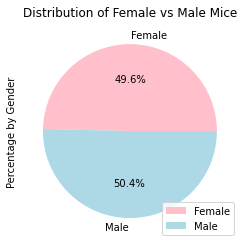

In [16]:
# Pyplot Pie Chart

# create lists for labels and data
labels = gender_count.index
counts = gender_count["Mouse ID"].to_list()


# set the colors of each section of the pie chart
colors = ["pink", "lightblue"]

# generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts, labels=labels, colors=colors, autopct="%1.1f%%")

# create title, labels and legend
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Percentage by Gender")
plt.legend(loc="lower right")

# display the chart
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# sort data by mouse ID and timepoint in descending order to get the
# final timepoint listed first
sorted_df = combined_data.sort_values(["Mouse ID", "Timepoint"], ascending=False)

# remove duplicate mouse ID, keeping only the final timepoint for each
high_tp_df = sorted_df.drop_duplicates(subset="Mouse ID", keep="first")


In [22]:
# put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# loop through list of drug regimens of interest
# calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    # pull all tumor volume data for the current drug regimen
    curr_drug_df = high_tp_df[high_tp_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    
    # convert it to a list
    tumor_vol_list.append(curr_drug_df.to_list())
    
    # grab the quartiles
    quartiles = curr_drug_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # calculate the IQR and the upper and lower bounds
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # print our drug stats
    print(f"{drug} Stats")
    print("---------------------")
    print(f"Lower Quartile: {lowerq:.2f}\tUpper Quartile: {upperq:.2f}")
    print(f"Interquartile range of Tumor Volumes: {iqr:.2f}")
    print(f"Median Tumor Volume: {quartiles[0.5]:.2f}")
    print(f"Potential outliers: Values below {lower_bound:.2f} or above {upper_bound:.2f}\n")
    


Capomulin Stats
---------------------
Lower Quartile: 32.38	Upper Quartile: 40.16
Interquartile range of Tumor Volumes: 7.78
Median Tumor Volume: 38.13
Potential outliers: Values below 20.70 or above 51.83

Ramicane Stats
---------------------
Lower Quartile: 31.56	Upper Quartile: 40.66
Interquartile range of Tumor Volumes: 9.10
Median Tumor Volume: 36.56
Potential outliers: Values below 17.91 or above 54.31

Infubinol Stats
---------------------
Lower Quartile: 54.05	Upper Quartile: 65.53
Interquartile range of Tumor Volumes: 11.48
Median Tumor Volume: 60.17
Potential outliers: Values below 36.83 or above 82.74

Ceftamin Stats
---------------------
Lower Quartile: 48.72	Upper Quartile: 64.30
Interquartile range of Tumor Volumes: 15.58
Median Tumor Volume: 59.85
Potential outliers: Values below 25.36 or above 87.67



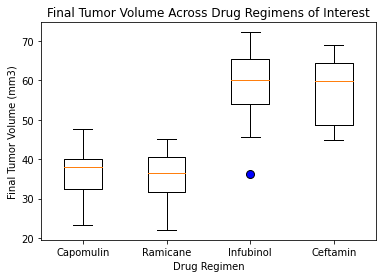

In [23]:
# Box Plot

# generate a box plot of the final tumor volume of each mouse across four regimens of interest

# define outlier properties
flierprops = dict(marker='o', markerfacecolor='blue', markersize=8, linestyle='none')

# drow 4 boxplots in one figure
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list, showfliers=True, labels=regimens, flierprops=flierprops)

# create title and axis labels
plt.title("Final Tumor Volume Across Drug Regimens of Interest")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# display the chart
plt.show()

## Line and Scatter Plots

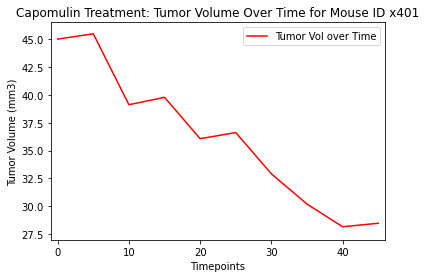

In [50]:
# create lists of tumor volume data and timepoints for a mouse on Capomulin
tvolume = combined_data.loc[combined_data["Mouse ID"] == "x401"]["Tumor Volume (mm3)"].to_list()
timepoints = combined_data.loc[combined_data["Mouse ID"] == "x401"]["Timepoint"].to_list()

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse, = plt.plot(timepoints, tvolume, color="red", label="Tumor Vol over Time")

# Create a legend and limits for our chart
plt.legend(handles=[capomulin_mouse], loc="best")
plt.xlim(-1, timepoints[-1]+1)
plt.ylim(27, 46.5)


# create title and axis labels
plt.title("Capomulin Treatment: Tumor Volume Over Time for Mouse ID x401")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")


# display the chart
plt.show()

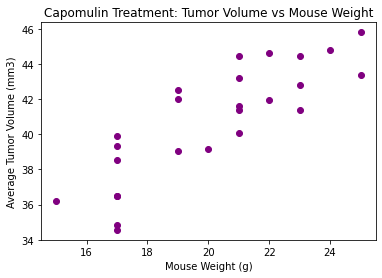

In [48]:
# Scatter Plot

# pull all data associated with Capomulin
capomulin_df = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# calculate the average tumor volume for each mouse
scatter_df = capomulin_df.groupby("Mouse ID").mean()
scatter_df = scatter_df.astype('float32')

# pull weight and average tumor volume into lists for plotting
weight = scatter_df["Weight (g)"]
avgvolume = scatter_df["Tumor Volume (mm3)"]

# generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weight, avgvolume, facecolor="purple")

# create title and axis labels
plt.title("Capomulin Treatment: Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# display the chart
plt.show()


## Correlation and Regression


The correlation between mouse weight and the average tumor volume is 0.84


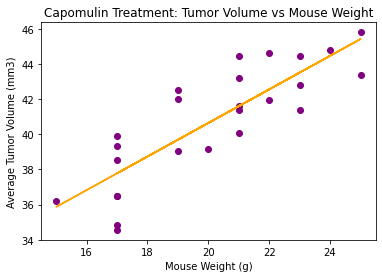

In [49]:
# calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(weight, avgvolume)[0], 2)

print(f"\nThe correlation between mouse weight and the average tumor volume is {corr}")

reg = st.linregress(weight, avgvolume)

# calculate the y values for our line
y_values = weight * reg.slope + reg.intercept

# plot the points and linear regression
plt.scatter(weight, avgvolume, facecolor="purple")
plt.plot(weight, y_values, color="orange")

# create the title and axis labels
plt.title("Capomulin Treatment: Tumor Volume vs Mouse Weight")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# display the chart
plt.show()